In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Topic - Customer Behaviour Analysis & Prediction

### Machine Learning2 Project
### 21BDA59
### Purva Singh

### Loading the data

In [2]:
data = pd.read_csv("marketing_campaign.csv")
data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Drop unwanted columns

In [3]:
df = data.drop(["Z_CostContact","Z_Revenue"], axis=1)
df 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,5,10,3,0,0,0,0,0,0,0


### Knowing the data

In [4]:
#data types
df.dtypes 

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking Null Values

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

##### Column 'Income' has 24 null values

#### Data Cleaning

In [8]:
df['Income'] = df['Income'].replace(np.NaN, df['Income'].mean())

In [9]:
data1=df.drop_duplicates() 
data1.shape

(2240, 27)

#### Uni-variate analysis without considering relationships with other variables

#### check for skwness

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


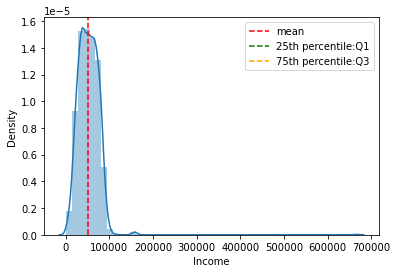

In [10]:
sns.distplot(data1['Income'])
plt.axvline(x=np.mean(data['Income']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(data['Income'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(data['Income'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='Density'>

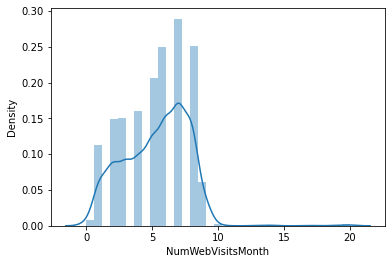

In [11]:
sns.distplot(data1["NumWebVisitsMonth"])

#### check for outlier

<AxesSubplot:>

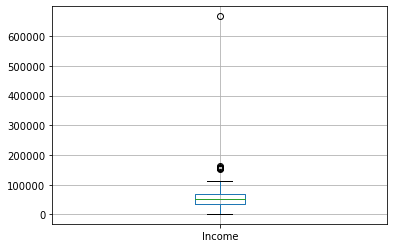

In [12]:
data1.boxplot(column=["Income"])

## Exploratory Data Analysis

### 1) Difference in Education Status

<AxesSubplot:>

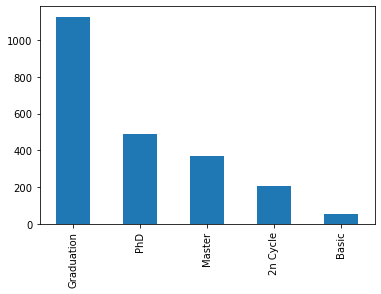

In [13]:
data1['Education'].value_counts().plot(kind='bar')

#### Conclusion - Majority of the customers are Graduated

### 2) Difference in Marital_Status

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

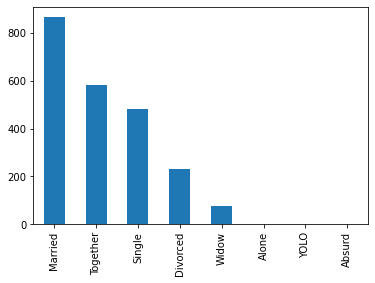

In [14]:
data1['Marital_Status'].value_counts().plot(kind='bar')
data1['Marital_Status'].value_counts()

#### Conclusion - Majority of customers are married followed

### 3) Customer accepted the offer in the 1st campaign

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2096
1     144
Name: AcceptedCmp1, dtype: int64

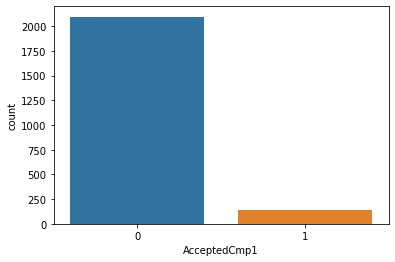

In [15]:
sns.countplot(data1["AcceptedCmp1"])
data1['AcceptedCmp1'].value_counts()

#### Conclusion - Customers who accepted the offer in 1st Campaign are 144

### 4) customer accepted the offer in the 2st campaign

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2210
1      30
Name: AcceptedCmp2, dtype: int64

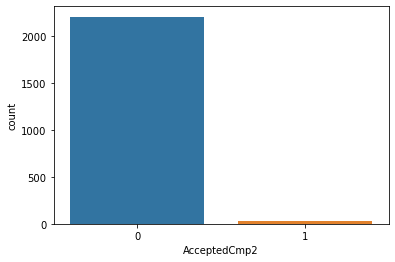

In [16]:
sns.countplot(data1["AcceptedCmp2"])
data1['AcceptedCmp2'].value_counts()

#### Conclusion - Customers who accepted the offer in 2nd Campaign are 30

### 5) customer accepted the offer in the 3st campaign

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2077
1     163
Name: AcceptedCmp3, dtype: int64

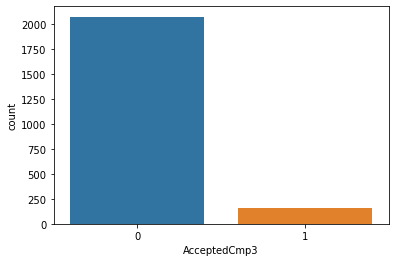

In [17]:
sns.countplot(data1["AcceptedCmp3"])
data1['AcceptedCmp3'].value_counts()

#### Conclusion - Customers who accepted the offer in 3rd Campaign are 163

### 6) customer accepted the offer in the 4st campaign

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2073
1     167
Name: AcceptedCmp4, dtype: int64

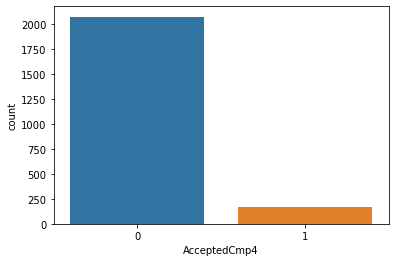

In [18]:
sns.countplot(data1["AcceptedCmp4"])
data1['AcceptedCmp4'].value_counts()

#### Conclusion - Customers who accepted the offer in 4th Campaign are 167

### customer accepted the offer in the 5st campaign

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0    2077
1     163
Name: AcceptedCmp5, dtype: int64

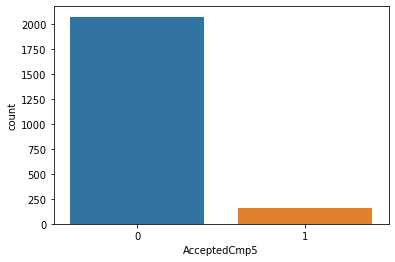

In [19]:
sns.countplot(data1["AcceptedCmp5"])
data1['AcceptedCmp5'].value_counts()

#### Conclusion - Customers who accepted the offer in 5th Campaign are 163

## Bi-variate analysis

#### 1) Income VS Education

<AxesSubplot:xlabel='Income', ylabel='Education'>

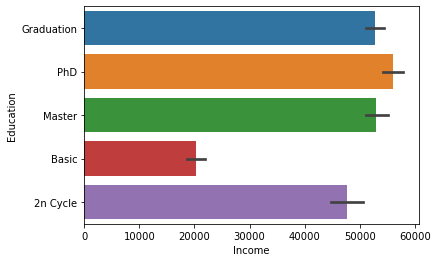

In [20]:
sns.barplot(x='Income', y="Education",  data=data1)

#### 2) Number of complain with respect to marital status

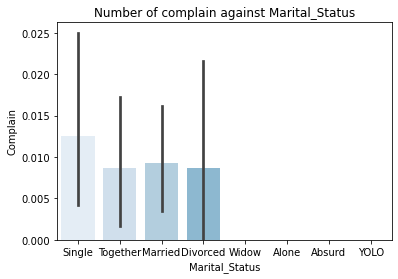

In [21]:
#Creating bar plot
sns.barplot(x = 'Marital_Status',y = 'Complain',data = data1, palette = "Blues")
#Adding the aesthetics
plt.title('Number of complain against Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Complain') 
# Show the plot
plt.show()

#### Number of kidhome (kids in house)

<AxesSubplot:ylabel='Kidhome'>

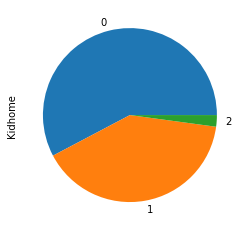

In [22]:
data1.Kidhome.value_counts().plot(kind="pie")

#### Number of Teenhome (Teens in house)

<AxesSubplot:ylabel='Teenhome'>

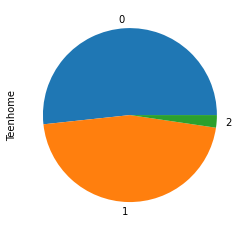

In [23]:
data1.Teenhome.value_counts().plot(kind="pie")

#### Education with respect to Income

<AxesSubplot:xlabel='Education', ylabel='Income'>

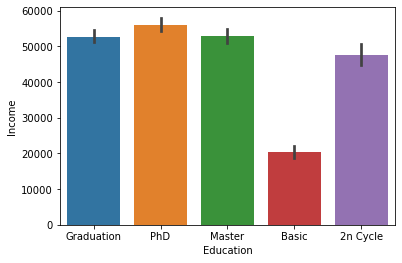

In [24]:
sns.barplot(x='Education', y="Income",  data=data1)

#### Number of complain

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Complain', ylabel='count'>

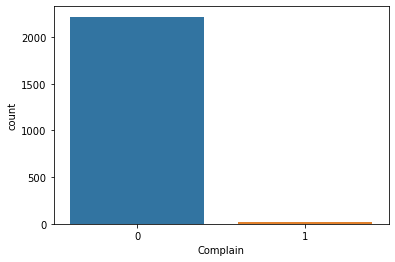

In [25]:
sns.countplot(df['Complain'])

#### count of money spent on Wine with respect to Kidhome

<AxesSubplot:xlabel='Kidhome', ylabel='MntWines'>

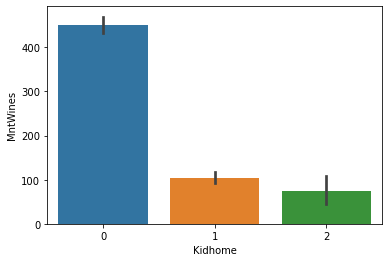

In [26]:
sns.barplot(x='Kidhome', y="MntWines",  data=data1)

#### count of money spent on Wine with respect to Teenhome

<AxesSubplot:xlabel='Teenhome', ylabel='MntWines'>

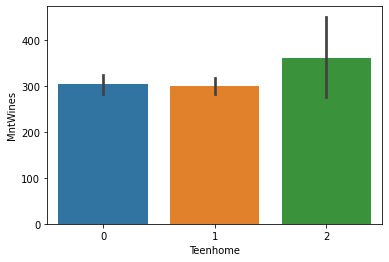

In [27]:
sns.barplot(x='Teenhome', y="MntWines",  data=data1)

#### count of money spent on fruits with respect to Kidhome

<AxesSubplot:xlabel='Kidhome', ylabel='MntFruits'>

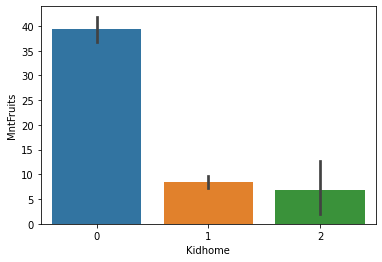

In [28]:
sns.barplot(x='Kidhome', y="MntFruits",  data=data1)
#Number of online purchases done based on customer's education

#### count of money spent on fruits with respect to Teenhome

<AxesSubplot:xlabel='Teenhome', ylabel='MntFruits'>

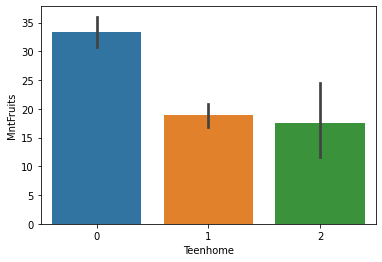

In [29]:
sns.barplot(x='Teenhome', y="MntFruits",  data=data1)
#Number of online purchases done based on customer's education

#### Number of online purchases done based on customer's education

<AxesSubplot:xlabel='Education', ylabel='NumWebPurchases'>

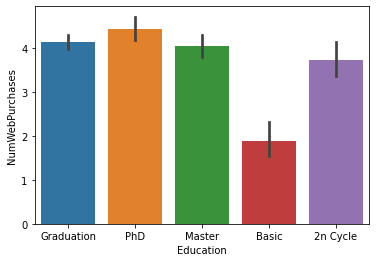

In [30]:
sns.barplot(x='Education', y="NumWebPurchases",  data=data1)

#### Number of ofline purchases done based on customer's education

<AxesSubplot:xlabel='Education', ylabel='NumCatalogPurchases'>

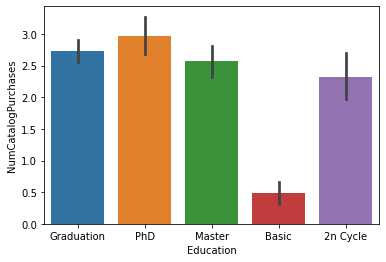

In [31]:
sns.barplot(x='Education', y="NumCatalogPurchases",  data=data1)

#### Number of online purchases done based on customer's Income

<AxesSubplot:xlabel='NumWebPurchases', ylabel='Income'>

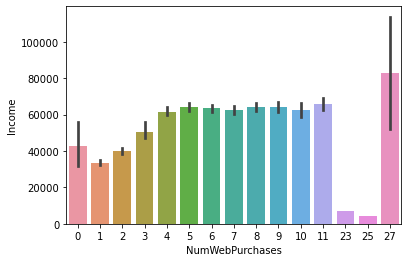

In [32]:
sns.barplot(x='NumWebPurchases', y="Income",  data=data1)

#### Number of ofline purchases done based on customer's Income

<AxesSubplot:xlabel='NumCatalogPurchases', ylabel='Income'>

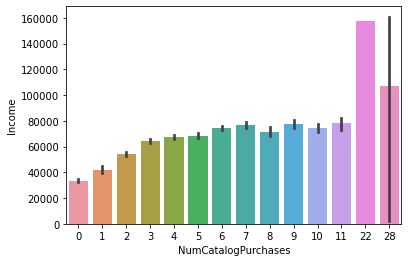

In [33]:
sns.barplot(x='NumCatalogPurchases', y="Income",  data=data1)


#### Number of complain with marital status respect to kidhomes

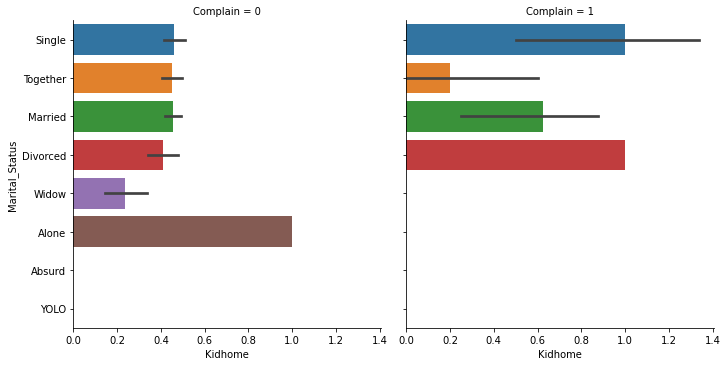

In [34]:
sns.catplot(x='Kidhome', y='Marital_Status', col='Complain', data=data1, kind='bar')

#### Number of complain with marital status respect to Teenhome

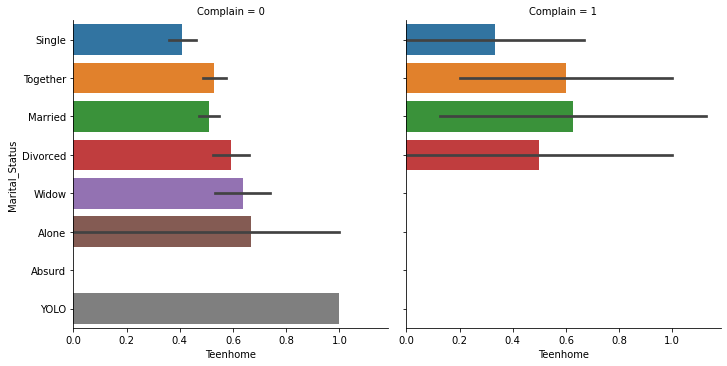

In [35]:
sns.catplot(x='Teenhome', y='Marital_Status', col='Complain', data=data1, kind='bar')

### Correlation analysis

### Heat Map

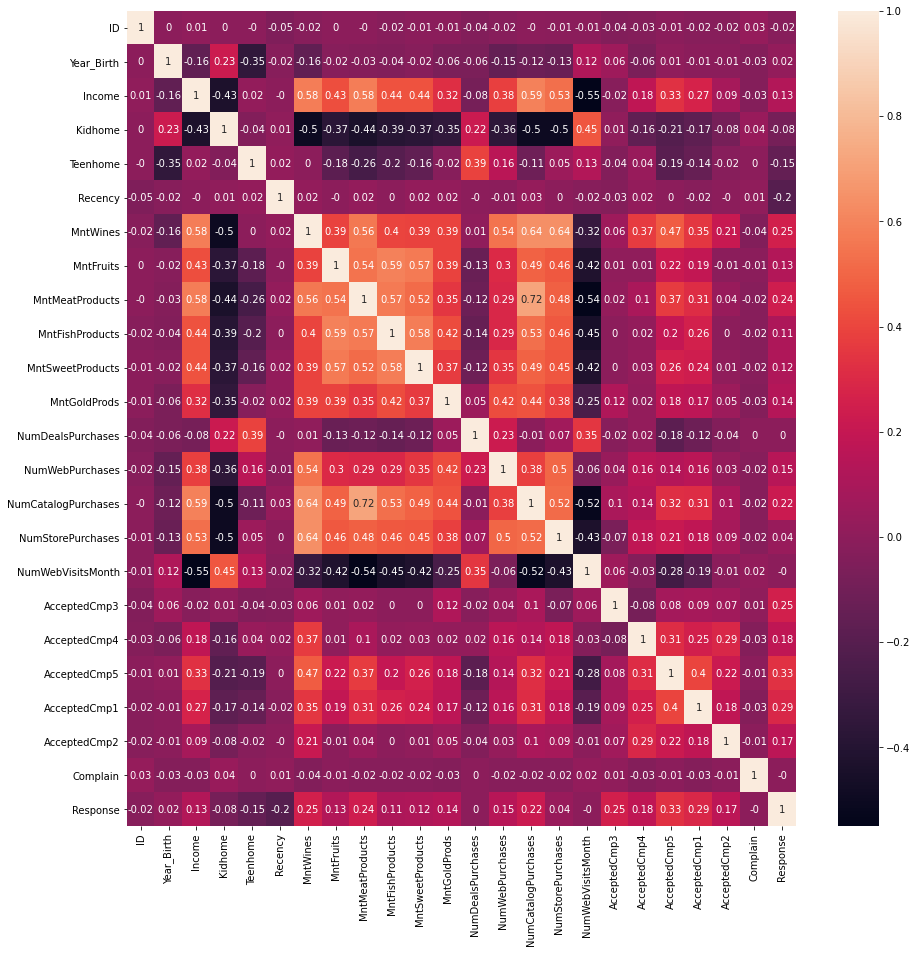

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(np.round(data1.corr(),2), annot=True) 
plt.show()

### Scaling and Normilization

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [38]:
data1['Education']= label_encoder.fit_transform(data1['Education'])
data1['Marital_Status']= label_encoder.fit_transform(data1['Marital_Status'])

In [39]:
data1=data1.drop("Dt_Customer", axis=1)

In [40]:
data1.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,3,6,5,0,0,0,0,0,0,0
5,7446,1967,3,5,62513.0,0,1,16,520,42,...,4,10,6,0,0,0,0,0,0,0
6,965,1971,2,2,55635.0,0,1,34,235,65,...,3,7,6,0,0,0,0,0,0,0
7,6177,1985,4,3,33454.0,1,0,32,76,10,...,0,4,8,0,0,0,0,0,0,0
8,4855,1974,4,5,30351.0,1,0,19,14,0,...,0,2,9,0,0,0,0,0,0,1
9,5899,1950,4,5,5648.0,1,1,68,28,0,...,0,0,20,1,0,0,0,0,0,0


In [41]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data1)
data_scaled = pd.DataFrame(data_scaled, columns=data1.columns)
data_scaled.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0.094526,0.033488,0.000034,0.000068,0.994848,0.000000,0.000000,0.000992,0.010866,0.001506,...,0.000171,0.000068,0.000120,0.0,0.0,0.0,0.0,0.0,0.0,0.000017
1,0.046817,0.042079,0.000043,0.000086,0.998016,0.000022,0.000022,0.000818,0.000237,0.000022,...,0.000022,0.000043,0.000108,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.057705,0.027383,0.000028,0.000070,0.997937,0.000000,0.000000,0.000362,0.005936,0.000683,...,0.000028,0.000139,0.000056,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.225410,0.072341,0.000073,0.000182,0.971574,0.000036,0.000000,0.000948,0.000401,0.000146,...,0.000000,0.000146,0.000219,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.090900,0.033823,0.000068,0.000051,0.995277,0.000017,0.000000,0.001605,0.002954,0.000734,...,0.000051,0.000102,0.000085,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


### Hierarchical Clustering (Agglomerative Clustering)

In [42]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot as plt
import seaborn as sns

#### Dendrogram with WARD Linkge

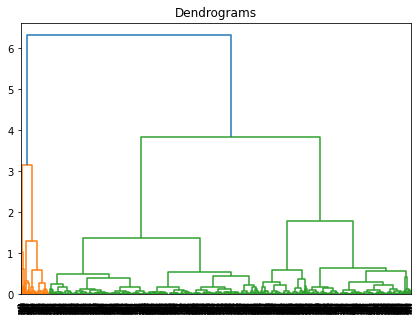

In [43]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))

#### The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with maximum distance is the blue line and hence we can decide a threshold and cut the dendrogram:

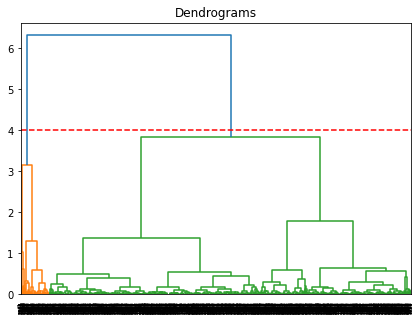

In [44]:
plt.figure(figsize=(7, 5))  
plt.title("Dendrograms")  
dend = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.axhline(y=4, color='r', linestyle='--')

#### Dendrogram with AVERAGE Linkge

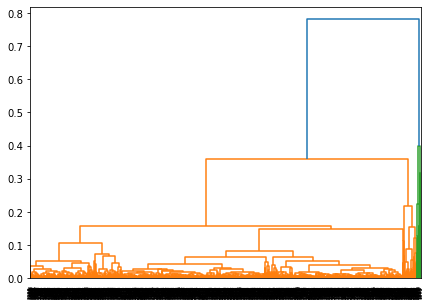

In [50]:
#create Dendrogram
plt.figure(figsize=(7, 5))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='average'))

#### Dendrogram with COMPLETE Linkge

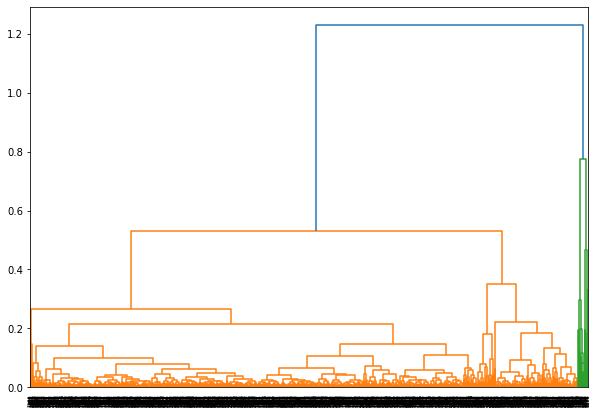

In [46]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='complete'))

#### Dendrogram with singke Linkage

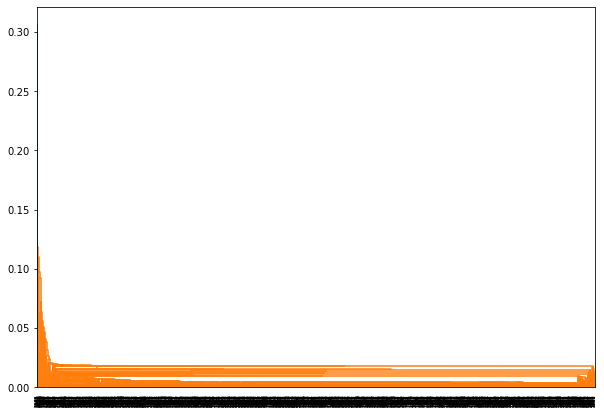

In [47]:
#create Dendrogram
plt.figure(figsize=(10, 7))  
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='single'))

#### Dendrogram with CENTROID Linkge

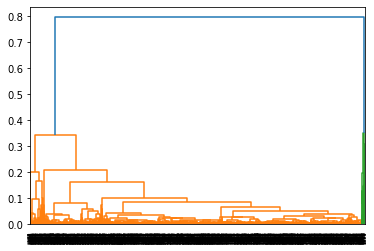

In [48]:
#create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(data_scaled,method='centroid'))


In [49]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward") 

In [51]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [52]:
clusters

,Clusters
0,2
1,2
2,2
3,0
4,2
...,...
2235,0
2236,2
2237,0
2238,0


In [53]:
df['Cluster_id']=hc.labels_

In [54]:
df.head(20)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Cluster_id
0,5524,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,2
1,2174,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,2
2,4141,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,2
3,6182,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,2
5,7446,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,...,10,6,0,0,0,0,0,0,0,0
6,965,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,...,7,6,0,0,0,0,0,0,0,2
7,6177,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,...,4,8,0,0,0,0,0,0,0,0
8,4855,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,...,2,9,0,0,0,0,0,0,1,0
9,5899,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,...,0,20,1,0,0,0,0,0,0,3


In [55]:
df.groupby("Cluster_id").agg(['mean']).reset_index()

,Cluster_id,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,7773.592635,1968.932106,45550.371421,0.560414,0.550058,48.049482,200.765247,18.588032,98.288838,...,1.804373,5.062140,5.817031,0.052934,0.048331,0.019563,0.018412,0.006904,0.010357,0.108170
1,1,9089.832168,1975.251748,22151.797203,0.804196,0.181818,49.174825,13.244755,4.517483,15.832168,...,0.363636,2.832168,7.041958,0.111888,0.000000,0.000000,0.000000,0.000000,0.020979,0.118881
2,2,3544.115257,1967.813433,61467.319459,0.316750,0.515755,49.967662,418.069652,34.791045,235.763682,...,3.568823,6.742952,4.677446,0.082919,0.103648,0.121061,0.106136,0.019900,0.007463,0.183250
3,3,8960.772727,1976.318182,6967.090909,0.500000,0.363636,43.500000,12.045455,7.272727,89.090909,...,1.772727,1.545455,9.363636,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909


In [56]:
label = hc.fit_predict(data_scaled)
print(label)

[2 2 2 ... 0 0 0]


#### centroid for all clusters

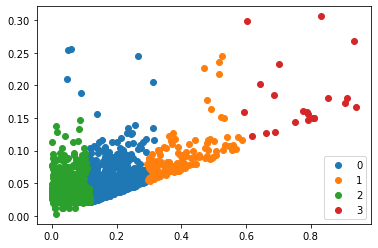

In [58]:
#Getting unique labels
 
u_labels1 = np.unique(label)
 
#plotting the results:
 
for i in u_labels1:
    plt.scatter(data_scaled.iloc[label == i , 0] , data_scaled.iloc[label == i , 1] , label = i)
plt.legend()
plt.show()

### Data Preparation required before Modelling

#### Making a single column 'Purchase' by combining various other columns

In [60]:
data['Purchases'] = data['NumDealsPurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,18
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,19
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,23


#### Making a single column 'Expenses' by combining various other columns

In [61]:
data['Expenses'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Purchases,Expenses
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,25,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,6,27
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,21,776
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,8,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,18,1341
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,22,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,19,1241
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,23,843


In [62]:
data['Campaign'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.head(50)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Purchases,Expenses,Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,25,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,6,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,21,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,8,53,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,19,422,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,0,0,0,0,3,11,0,22,716,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,0,0,0,0,3,11,0,21,590,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,0,0,0,0,3,11,0,10,169,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,0,0,0,0,3,11,1,6,46,0
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,0,0,0,0,3,11,0,2,49,1


In [63]:
data=data.drop("MntWines", axis=1)
data=data.drop("MntFruits", axis=1)
data=data.drop("MntMeatProducts", axis=1)
data=data.drop("MntFishProducts", axis=1)
data=data.drop("MntSweetProducts", axis=1)
data=data.drop("MntGoldProds", axis=1)
data=data.drop("AcceptedCmp1", axis=1)
data=data.drop("AcceptedCmp2", axis=1)
data=data.drop("AcceptedCmp3", axis=1)
data=data.drop("AcceptedCmp4", axis=1)
data=data.drop("AcceptedCmp5", axis=1)

In [64]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Response,Purchases,Expenses,Campaign
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,3,...,10,4,7,0,3,11,1,25,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,2,...,1,2,5,0,3,11,0,6,27,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,1,...,2,10,4,0,3,11,0,21,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,2,...,0,4,6,0,3,11,0,8,53,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,5,...,3,6,5,0,3,11,0,19,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,2,...,3,4,5,0,3,11,0,18,1341,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,7,...,2,5,7,0,3,11,0,22,444,1
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,1,...,3,13,6,0,3,11,0,19,1241,1
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,2,...,5,10,3,0,3,11,0,23,843,0


#### Dropping individual columns

In [65]:
data=data.drop("ID", axis=1)
data=data.drop("NumWebVisitsMonth", axis=1)
data=data.drop("NumDealsPurchases", axis=1)
data=data.drop("NumWebPurchases", axis=1)
data=data.drop("NumCatalogPurchases", axis=1)
data=data.drop("Z_CostContact", axis=1)
data=data.drop("Z_Revenue", axis=1)
data=data.drop("NumStorePurchases", axis=1)
data=data.drop("Dt_Customer", axis=1)

#### Data Preparation for Income

In [66]:
data['Income'] = data['Income'].replace(np.NaN, data['Income'].mean())
data=data.assign(Incomes=pd.cut(data['Income'], 
                               bins=[ 0, 25000, 50000,100000,666666], 
                               labels=['Below 25000', 'Income 25000-50000 ', 'Income 50000-100000 ','Above 100000']))
data=data.drop("Income", axis=1)

#### Data Preparation for Expenses

In [67]:
data['Expenses'] = data['Expenses'].replace(np.NaN, data['Expenses'].mean())
data=data.assign(Expense=pd.cut(data['Expenses'], 
                               bins=[ 0, 500, 1000, 2525], 
                               labels=['Below 500', 'Expense 500-1000 ','Above 1000']))
data=data.drop("Expenses", axis=1)

#### Data Preparation for Year of Birth

In [68]:
data['Year_Birth'] = data['Year_Birth'].replace(np.NaN, data['Year_Birth'].mean())
data[['Year_Birth']]=data['Year_Birth']
data=data.assign(DOB=pd.cut(data['Year_Birth'], 
                               bins=[ 0, 1959, 1977, 1996], 
                               labels=['Below 1959', 'DOB 1959-1977', 'DOB 1977-1996']))
data=data.drop("Year_Birth", axis=1)

#### Data Preparation for Education and Marital status

In [69]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'], 'relationship')
data['Marital_Status'] = data['Marital_Status'].replace(['Single', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'single')

data['Education'] = data['Education'].replace(['2n Cycle', 'Basic'], 'Basic')
data['Education'] = data['Education'].replace(['Graduation', 'Master'], 'Graduated')
data['Education'] = data['Education'].replace(['PhD'], 'PHD')

In [70]:
data.head(10)

,Education,Marital_Status,Kidhome,Teenhome,Recency,Complain,Response,Purchases,Campaign,Incomes,Expense,DOB
0,Graduated,single,0,0,58,0,1,25,0,Income 50000-100000,Above 1000,Below 1959
1,Graduated,single,1,1,38,0,0,6,0,Income 25000-50000,Below 500,Below 1959
2,Graduated,relationship,0,0,26,0,0,21,0,Income 50000-100000,Expense 500-1000,DOB 1959-1977
3,Graduated,relationship,1,0,26,0,0,8,0,Income 25000-50000,Below 500,DOB 1977-1996
4,PHD,relationship,1,0,94,0,0,19,0,Income 50000-100000,Below 500,DOB 1977-1996
5,Graduated,relationship,0,1,16,0,0,22,0,Income 50000-100000,Expense 500-1000,DOB 1959-1977
6,Graduated,single,0,1,34,0,0,21,0,Income 50000-100000,Expense 500-1000,DOB 1959-1977
7,PHD,relationship,1,0,32,0,0,10,0,Income 25000-50000,Below 500,DOB 1977-1996
8,PHD,relationship,1,0,19,0,1,6,0,Income 25000-50000,Below 500,DOB 1959-1977
9,PHD,relationship,1,1,68,0,0,2,1,Below 25000,Below 500,Below 1959


In [71]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [72]:
data['Education']= label_encoder.fit_transform(data['Education'])
data['Marital_Status']= label_encoder.fit_transform(data['Marital_Status'])
data['Incomes']= label_encoder.fit_transform(data['Incomes'])
data['DOB']= label_encoder.fit_transform(data['DOB'])
data['Expense']= label_encoder.fit_transform(data['Expense'])

In [73]:
data.head(5)

,Education,Marital_Status,Kidhome,Teenhome,Recency,Complain,Response,Purchases,Campaign,Incomes,Expense,DOB
0,1,1,0,0,58,0,1,25,0,3,0,0
1,1,1,1,1,38,0,0,6,0,2,1,0
2,1,0,0,0,26,0,0,21,0,3,2,1
3,1,0,1,0,26,0,0,8,0,2,1,2
4,2,0,1,0,94,0,0,19,0,3,1,2


In [74]:
from sklearn.preprocessing import normalize
data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,Education,Marital_Status,Kidhome,Teenhome,Recency,Complain,Response,Purchases,Campaign,Incomes,Expense,DOB
0,0.015809,0.015809,0.000000,0.000000,0.916946,0.0,0.015809,0.395235,0.0,0.047428,0.000000,0.000000
1,0.025915,0.025915,0.025915,0.025915,0.984773,0.0,0.000000,0.155491,0.0,0.051830,0.025915,0.000000
2,0.029722,0.000000,0.000000,0.000000,0.772770,0.0,0.000000,0.624160,0.0,0.089166,0.059444,0.029722
3,0.036491,0.000000,0.036491,0.000000,0.948753,0.0,0.000000,0.291924,0.0,0.072981,0.036491,0.072981
4,0.020833,0.000000,0.010417,0.000000,0.979167,0.0,0.000000,0.197917,0.0,0.031250,0.010417,0.020833


In [75]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [76]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage="ward")

In [77]:
y_hc=hc.fit_predict(data_scaled)
clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [78]:
data['Cluster_id']=hc.labels_

In [79]:
data.groupby("Cluster_id").agg(['mean']).reset_index()

,Cluster_id,Education,Marital_Status,Kidhome,Teenhome,Recency,Complain,Response,Purchases,Campaign,Incomes,Expense,DOB
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1.093883,0.353485,0.521337,0.490754,65.316501,0.009957,0.088905,12.726885,0.249644,2.283073,0.931721,1.002134
1,1,1.134783,0.386957,0.347826,0.508696,11.578261,0.004348,0.334783,18.095652,0.400000,2.582609,0.856522,0.991304
2,2,1.096907,0.354639,0.323711,0.531959,31.317526,0.012371,0.195876,18.400000,0.371134,2.589691,0.884536,1.002062
3,3,1.159664,0.319328,0.210084,0.579832,2.672269,0.000000,0.310924,19.420168,0.369748,2.680672,0.789916,0.848739


In [80]:
data

,Education,Marital_Status,Kidhome,Teenhome,Recency,Complain,Response,Purchases,Campaign,Incomes,Expense,DOB,Cluster_id
0,1,1,0,0,58,0,1,25,0,3,0,0,2
1,1,1,1,1,38,0,0,6,0,2,1,0,0
2,1,0,0,0,26,0,0,21,0,3,2,1,2
3,1,0,1,0,26,0,0,8,0,2,1,2,0
4,2,0,1,0,94,0,0,19,0,3,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,0,1,46,0,0,18,0,3,0,1,0
2236,2,0,2,1,56,0,0,22,1,3,1,0,0
2237,1,1,0,0,91,0,0,19,1,3,0,2,0
2238,1,0,0,1,8,0,0,23,0,3,2,0,1


In [81]:
X = data.drop("Cluster_id", axis=1)
y = data.Cluster_id
X.shape, y.shape

((2240, 12), (2240,))

### Using Random Forest for Prediction

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [83]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(max_depth=4, random_state = 10) 
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=10)

#### Testing accuracy

In [84]:
from sklearn.metrics import accuracy_score
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7611607142857143

#### Training accuracy

In [85]:
pred_train = model.predict(x_train)
accuracy_score(y_train,pred_train)

0.79296875

#### saving the model

In [86]:
# saving the model 
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()

### User Interface (Streamlit)

In [95]:
%%writefile machinelearning22.py

import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)
 
@st.cache()

# defining the function which will make the prediction using the data which the user inputs 
def prediction(Education, Marital_Status, DOB,Incomes,Kidhome,Teenhome,Purchases,Expense,Recency,Campaign,Complain, Response):   
 
    # Pre-processing user input    
    
    if Education == "Basic":
        Education = 0
        
    elif Education == "Graduated":
        Education = 1
        
    elif Education == "PHD":
        Education = 2
#*****************************************#      
    if Marital_Status == "Single":
        Marital_Status = 0
    
    elif Marital_Status == "Relationship":
        Marital_Status = 1
#*****************************************#        
    if Incomes == "Below 25000":
        Incomes = 1
    
    elif Incomes == "Income 25000-50000":
        Incomes = 2
        
    elif Incomes == "Income 50000-100000":
                
        Incomes = 3
        
    elif Incomes == "Above 100000":
        Incomes = 0
        

#*****************************************# 

    if Campaign == "Accepted 0 Campaign":
        Campaign = 0
    
    elif Campaign == "Accepted 1 Campaign":
        Campaign = 1
        
    elif Campaign == "Accepted 2 Campaign":
        Campaign = 2
        
    elif Campaign == "Accepted 3 Campaign":
        Campaign = 3  
        
    elif Campaign == "Accepted 4 Campaign":
        Campaign = 4
        


#*****************************************#    
    if Response == "YES":
        Response = 1
    
    elif Response == "NO":
        Response = 0

#*****************************************#      
    if Complain == "YES":
        Complain = 1
    
    elif Complain == "NO":
        Complain = 0
  #*****************************************#     

  #******************************
    prediction = classifier.predict( 
        [[Education, Marital_Status,DOB, Incomes, Kidhome,Teenhome,Purchases,Expense,Recency,Campaign,Complain, Response]])
            
    if prediction == 0:
        pred = 'cluster 0'
   
    elif prediction == 1:
        pred = 'cluster 1'
    
    elif prediction == 2:
        pred = 'cluster 2'
    return pred
   
      
  
# this is the main function in which we define our webpage  
def main():       
    # front end elements of the web page 
    html_temp = """ 
    <div style ="background-color:Yellow;padding:13px"> 
    <h1 style ="color:black;text-align:center;">Customer Behaviour Prediction</h1> 
    </div> 
    """
      
    # display the front end aspect
    st.markdown(html_temp, unsafe_allow_html = True) 
    
    # following lines create boxes in which user can enter data required to make prediction 
    
    Education = st.selectbox("Education",("Basic","Graduated","PHD"))
    
    Marital_Status = st.radio("Marital_Status: ", ('Single', 'Relationship'))
    if (Marital_Status == 'Single'):
        st.success("Single")
    elif (Marital_Status == 'Relationship'):
        st.success("Relationship")
    DOB = st.slider("Select DOB", 1930, 2021)
    st.text('Selected: {}'.format(DOB)) 
    
    Incomes = st.selectbox("Incomes",("Below 25000", "Income 25000-50000", "Income 50000-100000","Above 100000")) 
   
    Kidhome = st.text_input("Kidhome")
    
    Teenhome = st.text_input("Teenhome") 
    
    Purchases= st.slider("NUmber of Purchase Made", 0, 50)
    st.text('Selected: {}'.format(Purchases)) 
    
    Expense = st.slider("Select Monthly Expense", 0, 3000)
    st.text('Selected: {}'.format(Expense)) 
    
    Recency= st.slider("last Purchase", 0, 100)
    st.text('Selected: {}'.format(Recency)) 

    Campaign =st.selectbox("Campaign",("Accepted 0 Campaign","Accepted 1 Campaign","Accepted 2 Campaign","Accepted 3 Campaign","Accepted 4 Campaign"))
    
    Complain = st.selectbox("Complain",("YES","NO"))
    
    Response = st.selectbox("Accepted the offer in the last campaign",("YES","NO"))
    
    result =""
          
    # when 'Predict' is clicked, make the prediction and store it 
    if st.button("Predict"): 
        result = prediction(Education, Marital_Status,DOB, Incomes, Kidhome,Teenhome,Purchases,Expense,Recency, Campaign,Complain, Response) 
        st.success('Common cluster is {}'.format(result))
   
     
if __name__=='__main__': 
    main()


Overwriting machinelearning22.py
